In [2]:
import os
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris = datasets.load_iris()

In [19]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [30]:
X = iris.data
y = iris.target

In [32]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

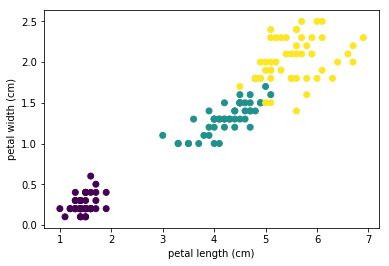

In [42]:
plt.scatter(X[:,2], X[:, 3], c = y)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

In [89]:
def euclidean_distance(x,y):
    return np.sqrt(np.sum((x-y)**2))

In [90]:
class KnnClassifier:
    
    def __init__(self, k = 5):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train    
    
    def predict(self, X_test):
        predicted_labels = [self._predict(x) for x in X_test]
        return predicted_labels
    
    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        K_nearest_labels = [self.y_train[i] for i in k_indices]
        
        countlabel = {} 
        for x in K_nearest_labels:
            if x in countlabel:
                countlabel[x]+=1
            else:
                countlabel[x] = 1
        return sorted(countlabel.items(), key = lambda kv:kv[1], reverse =True)[0][0]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [105]:
clf = KnnClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [106]:
np.sum(y_pred == y_test)/len(y_test)

0.9833333333333333

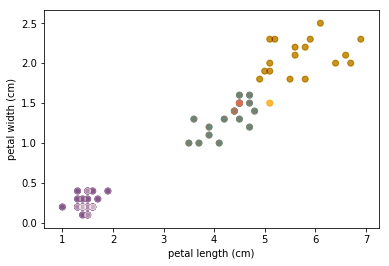

In [129]:
plt.scatter(X_test[:,2], X_test[:, 3], c = y_test)
plt.scatter(X_test[:,2], X_test[:, 3], c = y_pred, cmap = 'Reds', alpha = 0.35)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()